In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import requests
import json
from pprint import pprint

# Google developer API key
#from config import gkey

In [20]:
# setup file path
clipper_file = "./clipper_crude_prices.csv"
print(clipper_file)

# setup alt file path
alt_clipper_file = "./ClipperData.csv"
print(alt_clipper_file)

./clipper_crude_prices.csv
./ClipperData.csv


In [21]:
# read csv file
clipper_df = pd.read_csv(clipper_file, low_memory=False)
clipper_df.head(10)

# read alt csv file
alt_clipper_df = pd.read_csv(alt_clipper_file, low_memory=False)
alt_clipper_df.head(10)

,vessel,vessel_flag,vessel_class,imo,grade,grade_country,grade_region,grade_api,grade_sulfur,load_date,...,lat,lon,course,speed,draught,ais_timestamp,storage,storage_zone,distance_traveled,ton_miles
0,Elka Vassiliki,GREECE,Aframax,9249104,BRAZILIAN CRUDE,BRAZIL,LATIN AMERICA,medium,unknown,5/9/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,1739.767799,1.555610e+08
1,Kun Lun San,SINGAPORE,FSO,9534028,OMAN EXPORT,OMAN,ARAB GULF,medium,sour,9/29/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,5826.662802,1.604575e+09
2,Britanis,GREECE,VLCC,9227481,DAS,UNITED ARAB EMIRATES,ARAB GULF,light,sour,10/1/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,7028.726292,9.148161e+08
3,Britanis,GREECE,VLCC,9227481,DAS,UNITED ARAB EMIRATES,ARAB GULF,light,sour,10/1/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,7020.466892,9.137411e+08
4,Aquarius Voyager,BAHAMAS,VLCC,9289491,ARAB LIGHT,SAUDI ARABIA,ARAB GULF,light,sour,10/2/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,42144.060440,3.524762e+09
5,Aquarius Voyager,BAHAMAS,VLCC,9289491,ARAB LIGHT,SAUDI ARABIA,ARAB GULF,light,sour,10/2/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,42144.060440,1.684756e+09
6,Aquarius Voyager,BAHAMAS,VLCC,9289491,ARAB LIGHT,SAUDI ARABIA,ARAB GULF,light,sour,10/2/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,41523.983300,1.892249e+09
7,Aquarius Voyager,BAHAMAS,VLCC,9289491,ARAB LIGHT,SAUDI ARABIA,ARAB GULF,light,sour,10/2/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,42666.789080,3.801334e+09
8,Tenki,PANAMA,VLCC,9321299,UPPER ZAKUM,UNITED ARAB EMIRATES,ARAB GULF,light,sour,10/2/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,6659.671153,1.755724e+09
9,Bacaliaros,MARSHALL ISLANDS,Suezmax,9233777,VASCONIA,COLOMBIA,LATIN AMERICA,medium,sour,10/3/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,33180.763550,2.324677e+09


In [22]:
groupby_vessel_df=alt_clipper_df.groupby("vessel_class")
groupby_vessel_df.groups.keys()


dict_keys(['ATB', 'Aframax', 'Barge', 'Bunker', 'Coastal', 'FSO', 'Floating storage/production', 'GP', 'LNG', 'LR1', 'MR', 'Methanol', 'Open Hatch Carrier', 'Suezmax', 'ULCC', 'Unknown', 'VLCC'])

In [23]:
bbls_per_vessel=clipper_df.groupby(["activity"]).mean()["bbls"]
print(bbls_per_vessel)

activity
Load       562888.303874
Offtake    562939.361565
Name: bbls, dtype: float64


In [24]:
# Make list of only the off_take activity rows in order to make a plot

# offtake_activity=[]
# offtake_activity=clipper_df[clipper_df["activity"]==["Offtake"]]  
#print (offtake_activity)

ValueError: Arrays were different lengths: 133893 vs 1

In [25]:
bbls_per_offtakeport=alt_clipper_df.groupby(["offtake_port"]).sum()["bbls"]
print(bbls_per_offtakeport)

offtake_port
ABIDJAN              121632680
ACAJUTLA               5411000
ADEN                   2196000
AGIOI THEODOROI      223090632
AGUNG CITY             6864502
AIN SUKHNA          1058267955
AKITA KO                877250
AL AQABAH             60406500
ALEXANDRIA             2110000
ALGECIRAS            261744890
ALIAGA               273129322
AMBON, MOLUCAS          647000
AMSTERDAM              6858011
AMUAY                  5445450
ANACORTES            119116787
ANAN                   5860000
ANCHORAGE             44699869
ANCONA                63456939
ANGRA DOS REIS       517230217
ANTWERP              155858520
ARACAJU-TECARNO         454000
AS SUWAYS (SUEZ)       1681936
ASHDOD               227367481
ASHKELON              16080673
ASPROPYRGOS           30873448
AUGUSTA              288258052
BAHAMAS                 340500
BAHIA BLANCA         243055755
BAKAR                172916811
BALBOA                  230000
                       ...    
ULSAN                35106

In [26]:
bbls_per_loadport=alt_clipper_df.groupby(["load_port"]).sum()["bbls"]
print(bbls_per_loadport)

load_port
AASTA HANSTEEN             1503109
ABERDEEN                  16609192
ABIDJAN                   72389256
ABO FPSO                  16529875
AGBAMI FPSO              257499245
AGIOI THEODOROI             291787
AGIOS EFSTRATIOS           1998000
AGUNG CITY                 2000589
AIN SUKHNA                 7832531
AJE FIELD                  7224620
AKPO FPSO                140256515
AL FUHAYHIL FAHAHEEL     383890799
AL JU AYMAH             5025121873
AL JUBAIL                  1164404
AL RAYYAN                  5612165
AL SHAHEEN               350932970
ALBA FIELD                15633824
ALBA MARINA FSO            2771600
ALBANY                     5686322
ALVHEIM FPSO             108315491
AMSTERDAM                   818385
AMUAY                     23021623
AN GIANG                    895500
ANGRA DOS REIS           398281803
ANTAN TERMINAL            27615413
ANTWERP                     380683
ARACAJU-TECARNO           22577000
ARICA                      9456614
ARMADA PER

In [33]:
len(bbls_per_loadport)

488

TypeError: 'builtin_function_or_method' object is not iterable

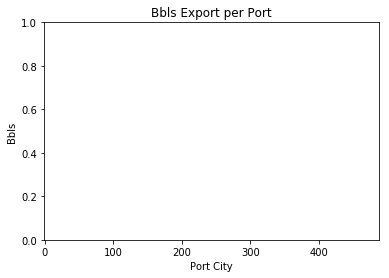

In [32]:
# Make a bar plot of port name and total bbls imported
x_axis = np.arange(0, len(bbls_per_loadport))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Bbls Export per Port")
plt.xlabel("Port City")
plt.ylabel("Bbls")

plt.xlim(-0.75, len(bbls_per_loadport)-.25)
plt.ylim(0, max(sum))

plt.bar(x_axis, sum, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, bbls_per_loadport)
plt.show()

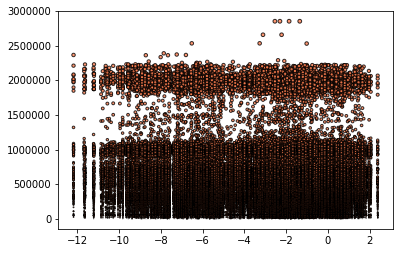

In [36]:
# Build the scatter plots for 
plt.scatter(clipper_df.delta, 
            clipper_df.bbls, 
            s=.000005*clipper_df.bbls, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="bbls")

# Save png file
plt.savefig('bblavsdelta.png', dpi=1000)
# Show plot
plt.show()


In [34]:
# # Build the scatter plots for 
# plt.hist(bbls_per_offtakeport.PORT, 
#             bbls_per_offtakeport.bbls,
#             s=.0000005*clipper_df.bbls, c="coral",
#             linewidths=1, marker="o", 
#             alpha=0.8, label="bbls")

# # Save png file
# plt.savefig('bblsumbyport.png', dpi=1000)
# # Show plot
# plt.show()

In [35]:
# Import from Quandl WTI crude oil price data
url = "https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL1.csv"
wticl1 = pd.read_csv(url, index_col=0, parse_dates=True)
wticl1.sort_index(inplace=True)
wticl1_last = wticl1['Last']
wticl1['PctCh'] = wticl1.Last.pct_change()

HTTPError: HTTP Error 429: Too Many Requests

In [18]:
print(type(wticl1))

<class 'pandas.core.frame.DataFrame'>


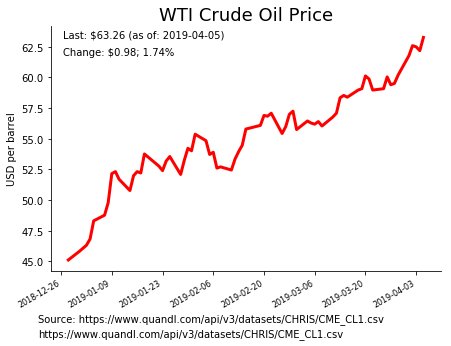

In [20]:
#Matplotlib plots

fig = plt.figure(figsize=[7,5])
ax1 = plt.subplot(111)
line = wticl1_last.tail(68).plot(color='red',linewidth=3)
ax1.set_ylabel('USD per barrel')
ax1.set_xlabel('')
ax1.set_title('WTI Crude Oil Price', fontsize=18)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', which='major', labelsize=8)
fig.text(0.15, 0.85,'Last: $' + str(wticl1.Last[-1])\
         + ' (as of: ' \
         + str(wticl1.index[-1].strftime('%Y-%m-%d'))\
         + ')');
fig.text(0.15, 0.80,'Change: $' + str(wticl1.Change[-1])\
         + '; ' \
         + str((np.round((wticl1.PctCh[-1] * 100), \
         decimals=2))) + '%')
fig.text(0.1, 0.06, 'Source: ' + url)
fig.text(0.1, 0.02, 'https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL1.csv')
plt.savefig('oil.png', dpi=1000)